In [1]:
# Import necessary libraries
import pandas as pd
data = pd.read_csv('Video Games Sales.csv')
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64


In [2]:
# Convert numeric columns to the appropriate data types (if needed)
# For columns like North America, Europe, Japan, Rest of World, and Global, ensure they are numeric.
data['North America'] = pd.to_numeric(data['North America'], errors='coerce')
data['Europe'] = pd.to_numeric(data['Europe'], errors='coerce')
data['Japan'] = pd.to_numeric(data['Japan'], errors='coerce')
data['Rest of World'] = pd.to_numeric(data['Rest of World'], errors='coerce')
data['Global'] = pd.to_numeric(data['Global'], errors='coerce')

In [3]:
df = pd.DataFrame(data)

In [7]:
df.dropna(subset=['Year'], inplace=True)
df.dropna(subset=['Publisher'], inplace=True)

In [8]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64


In [10]:

median_year = data['Year'].median()
data['Year'].fillna(median_year, inplace=True)

most_frequent_publisher = data['Publisher'].mode().iloc[0]
data['Publisher'].fillna(most_frequent_publisher, inplace=True)

missing_values = data.isnull().sum()
print("Missing Values", missing_values)


Missing Values index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64


Summary Statistics:
            index       Rank         Year  North America       Europe  \
count  1907.0000  1907.0000  1907.000000    1907.000000  1907.000000   
mean    953.0000   954.0000  2003.785527       1.258789     0.706675   
std     550.6478   550.6478     5.852295       1.956560     1.148904   
min       0.0000     1.0000  1983.000000       0.000000     0.000000   
25%     476.5000   477.5000  2001.000000       0.510000     0.230000   
50%     953.0000   954.0000  2005.000000       0.810000     0.440000   
75%    1429.5000  1430.5000  2008.000000       1.375000     0.810000   
max    1906.0000  1907.0000  2012.000000      40.430000    28.390000   

             Japan  Rest of World       Global       Review  
count  1907.000000    1907.000000  1907.000000  1907.000000  
mean      0.317493       0.206471     2.489240    79.038977  
std       0.724945       0.343093     3.563159    10.616899  
min       0.000000       0.000000     0.830000    30.500000  
25%       0.000000  

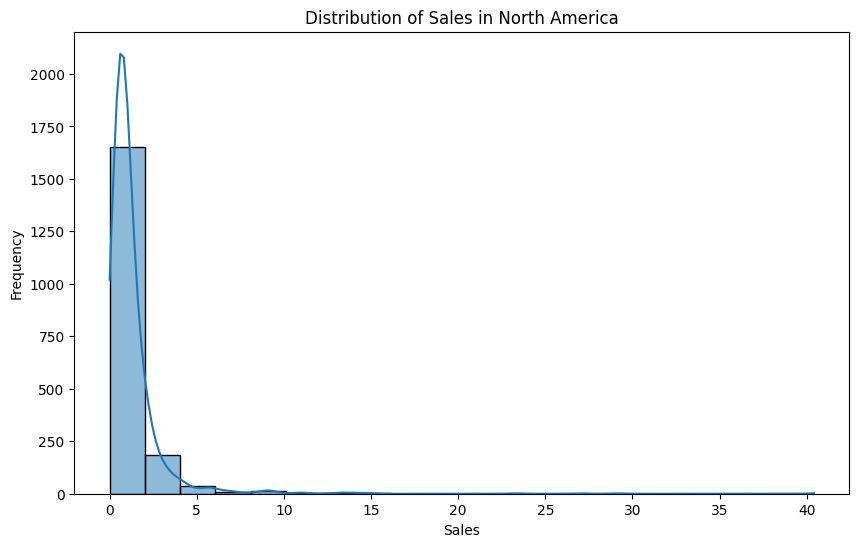

In [11]:
#eda
# Summary statistics
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

# Visualize the distribution of sales in different regions (e.g., North America, Europe, Japan)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['North America'], bins=20, kde=True)
plt.title("Distribution of Sales in North America")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


In [12]:
#hit games
# Sorting the dataset by global sales in descending order
top_selling_games = data.sort_values(by='Global', ascending=False).head(10)

# Or, filter games with a minimum global sales threshold (e.g., 10 million)
successful_games = data[data['Global'] >= 10]

# You can define success based on other criteria, such as user reviews or a combination of factors.


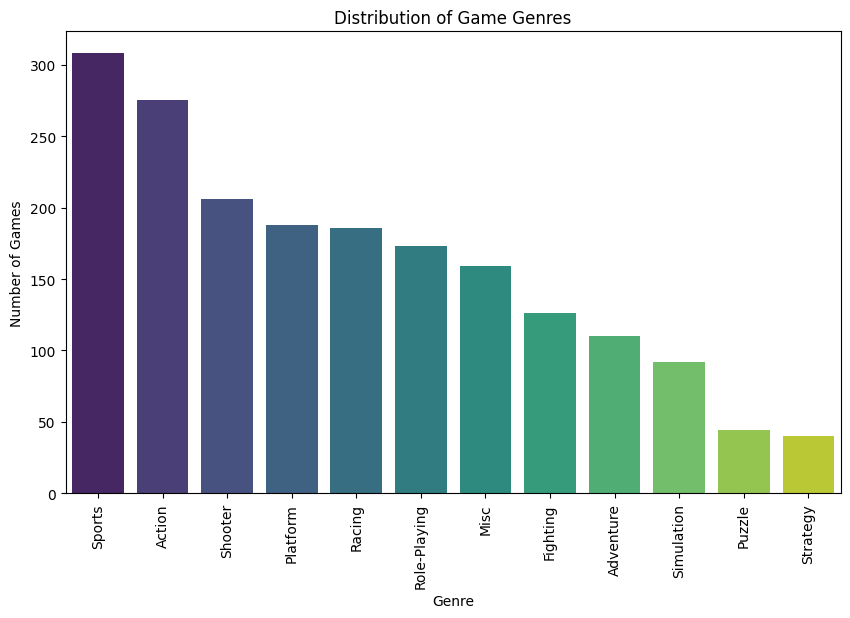

In [13]:
#Trends in Game Genres
# Count the number of games per genre
genre_counts = data['Genre'].value_counts()

# Create a bar plot to show the distribution of game genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Distribution of Game Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Games")
plt.xticks(rotation=90)
plt.show()


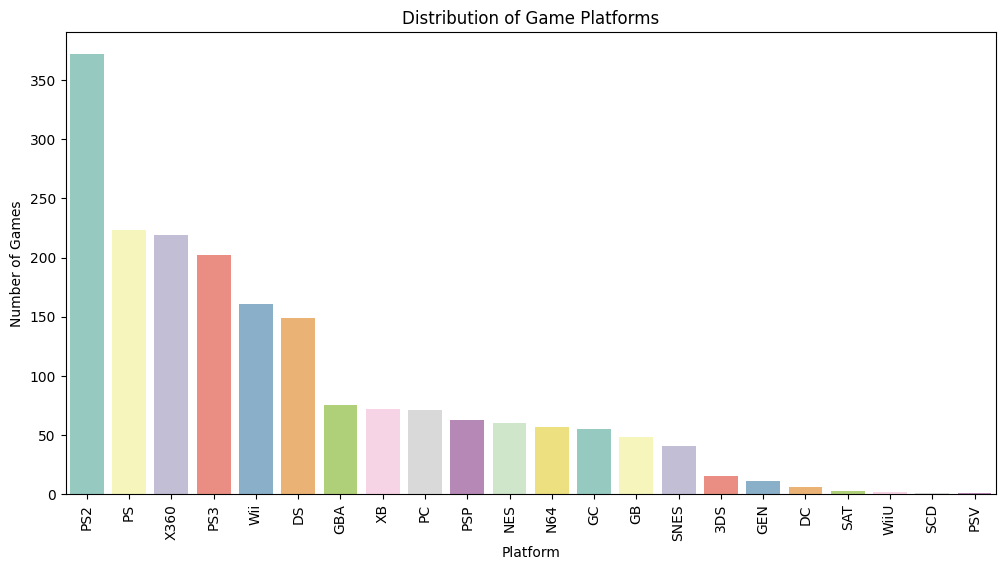

In [14]:
#Trends in Game Platforms

#Visualize the distribution of game platforms and identify trends:
# Count the number of games per platform
platform_counts = data['Platform'].value_counts()
# Create a bar plot to show the distribution of game platforms
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="Set3")
plt.title("Distribution of Game Platforms")
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.xticks(rotation=90)
plt.show()



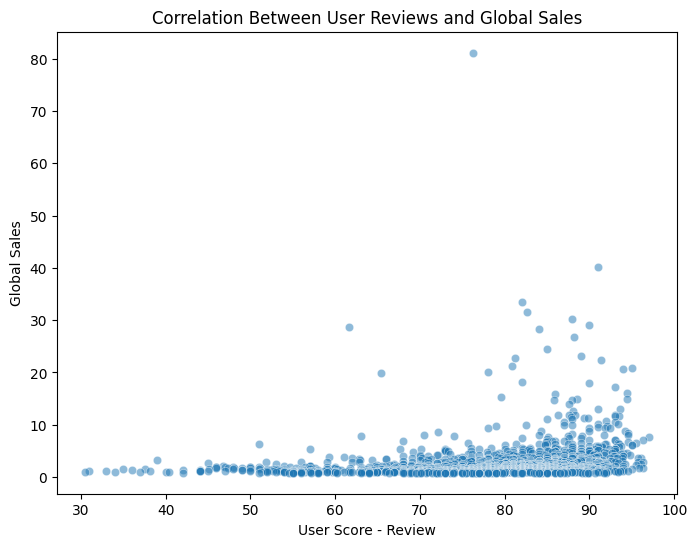

Correlation between User Reviews and Global Sales: 0.18


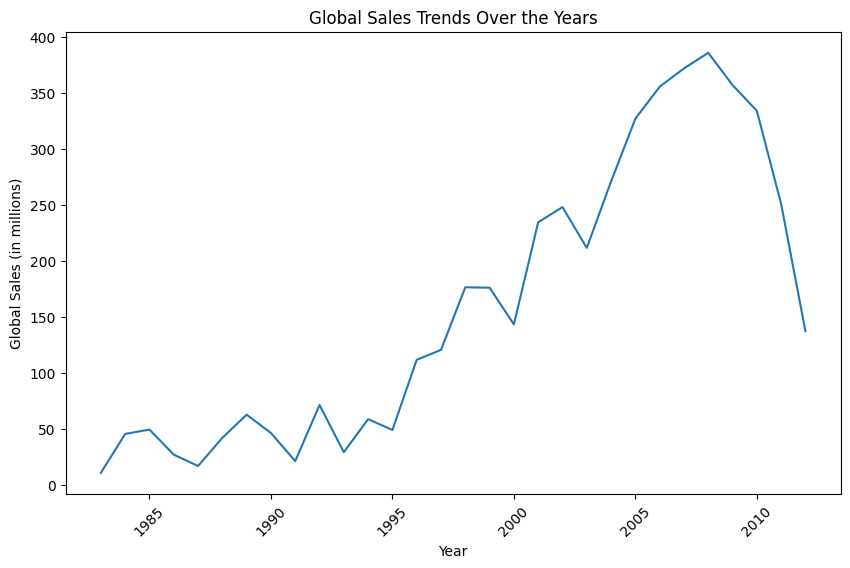

In [18]:
# Correlations Between User Reviews and Sales

#Visualize the correlations between user reviews and global sales:

# Create a scatter plot to visualize the relationship between user reviews and global sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Review', y='Global', data=data, alpha=0.5)
plt.title("Correlation Between User Reviews and Global Sales")
plt.xlabel("User Score - Review")
plt.ylabel("Global Sales")
plt.show()

# Calculate the correlation coefficient between user reviews and global sales
correlation = data['Review'].corr(data['Global'])
print(f"Correlation between User Reviews and Global Sales: {correlation:.2f}")


#Changes in the Gaming Industry Over the Years

#Visualize changes in the gaming industry over the years, such as global sales trends:

# Group the data by year and calculate total global sales for each year
yearly_sales = data.groupby('Year')['Global'].sum()

# Create a line plot to show trends in global sales over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title("Global Sales Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Genre Trends Over Time'}, xlabel='Year'>

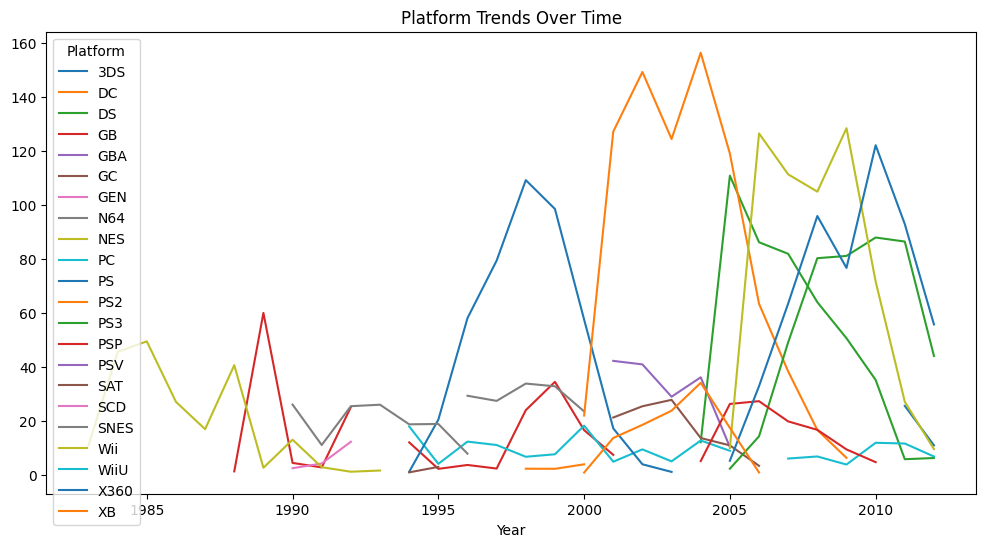

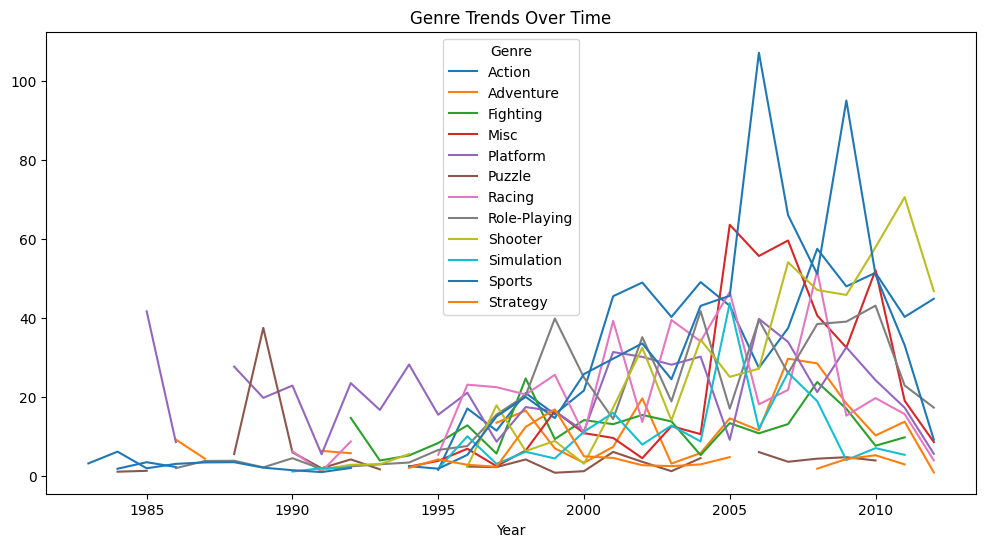

In [19]:
#Time series
# Grouping data by year and platform to track platform trends over time
platform_trends = data.groupby(['Year', 'Platform'])['Global'].sum().unstack()
platform_trends.plot(kind='line', figsize=(12, 6), title="Platform Trends Over Time")

# Grouping data by year and genre to track genre trends over time
genre_trends = data.groupby(['Year', 'Genre'])['Global'].sum().unstack()
genre_trends.plot(kind='line', figsize=(12, 6), title="Genre Trends Over Time")


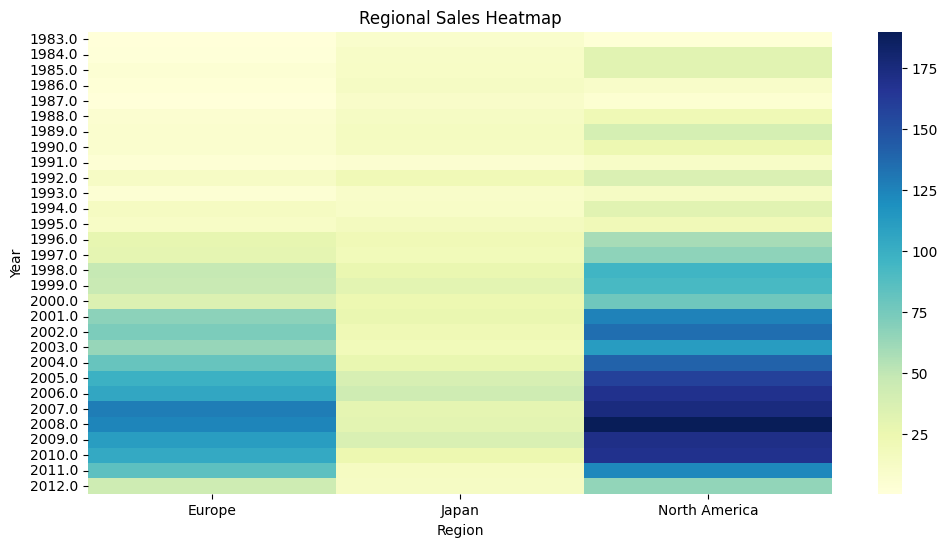

In [20]:
#region wise sales
# Create a pivot table for regional sales
regional_sales = data.pivot_table(values=['North America', 'Europe', 'Japan'], index='Year', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(regional_sales, cmap='YlGnBu')
plt.title("Regional Sales Heatmap")
plt.xlabel("Region")
plt.ylabel("Year")
plt.show()


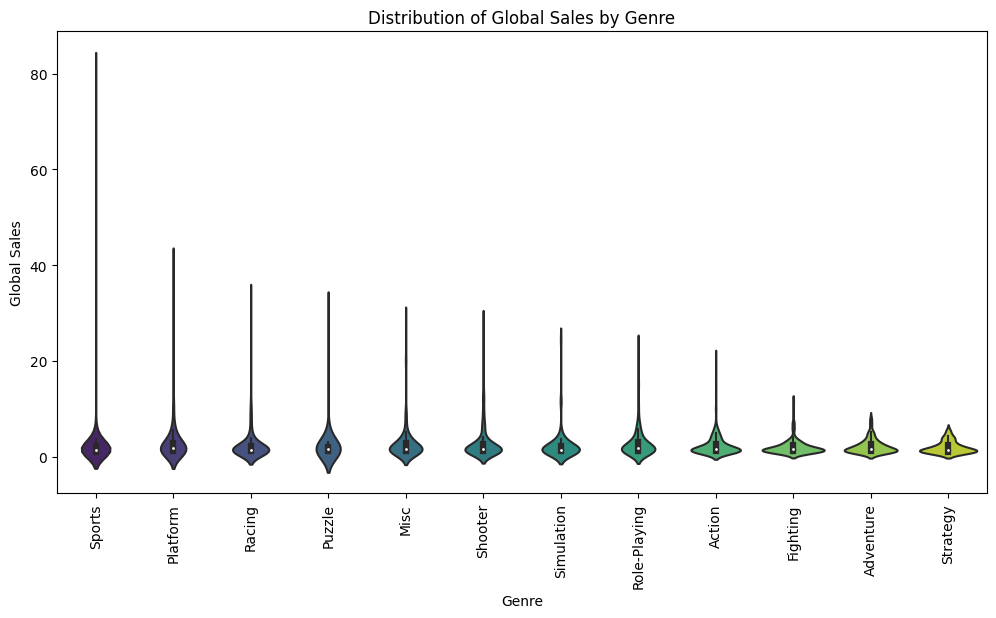

In [21]:
#violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(x='Genre', y='Global', data=data, palette='viridis')
plt.title("Distribution of Global Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Global Sales")
plt.xticks(rotation=90)
plt.show()


<Axes: title={'center': 'Cumulative Global Sales by Genre Over Time'}, xlabel='Year'>

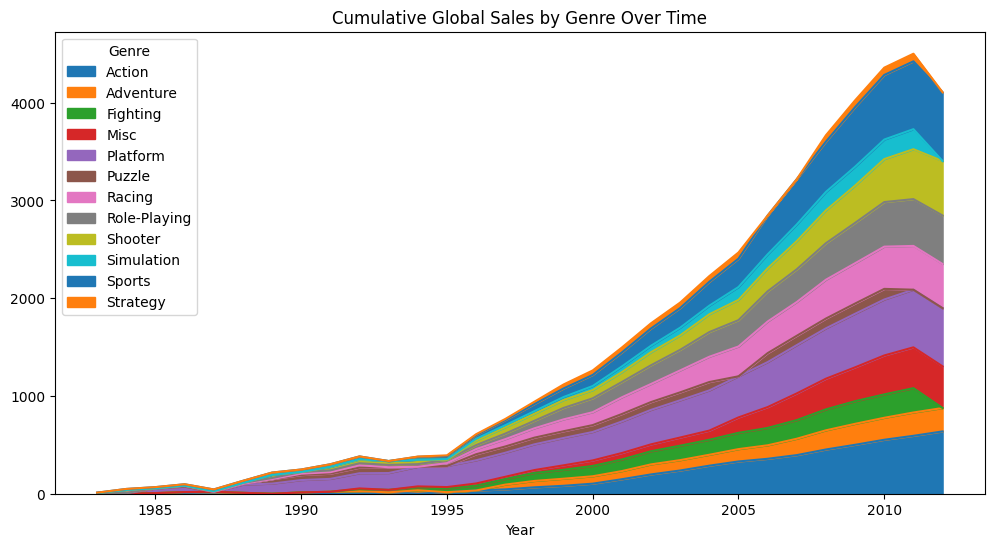

In [22]:
# Create a pivot table for cumulative global sales by genre over time
cumulative_genre_sales = genre_trends.cumsum()
cumulative_genre_sales.plot(kind='area', stacked=True, figsize=(12, 6), title="Cumulative Global Sales by Genre Over Time")


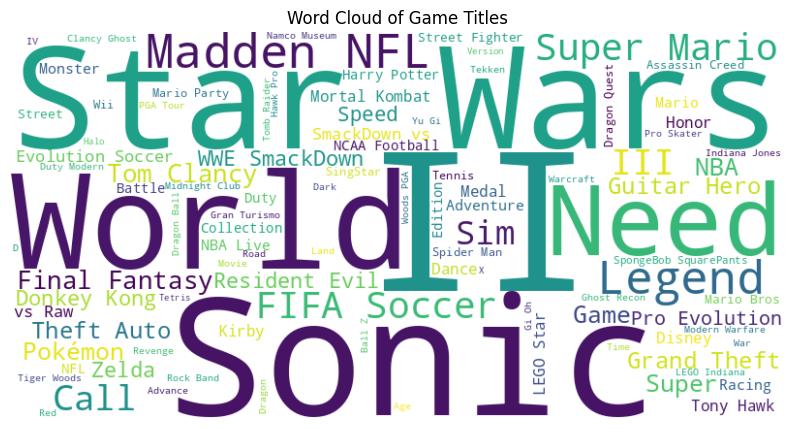

In [23]:
from wordcloud import WordCloud

title_text = " ".join(data['Game Title'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(title_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Game Titles")
plt.axis("off")
plt.show()
